# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

**Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type.** This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer 
**(i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).**

## INDEX


- <a href='#1'>1. LOAD THE LIBRARIES AND READ THE DATA</a>  
    - <a href='#1.1'>1.1. LOAD LIBRARIES</a> 
    - <a href='#1.2'>1.2. READ THE DATA</a>  
- <a href='#2'>2. OVERVIEW </a>  
- <a href='#3'>3. COMBINE THE THREE FILES </a>  
- <a href='#4'> 4.  ANALYSIS OF DATA BASED ON  DEMOGRAPHICS </a>
- <a href='#5'>5. ML MODELING</a>     
- <a href='#6'>6. FEATURE ENGINEERING </a> 
- <a href='#7'>7. CONCLUSION </a> 
   - <a href='#7.1'> 7.1. SCOPE FOR FURTHER INVESTIGATION</a>

### <a id='1.1'>1.1. LOAD LIBRARIES</a> 

In [2]:
import numpy as np
import pandas as pd
import math
import json
import datetime
%matplotlib inline

# Libraries for plotting
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.tools as tls
import plotly.figure_factory as ff

#Import time
import time

#Ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 
style_dict = {'background-color':'lightyellow','color':'#000000','border-color': 'red','font-family':'Roboto'}

### <a id = '1.2'> 1.2. READ THE DATA </a> 

Data source: [Starbucks capstone project](https://udacity.com/)

In [3]:
# Read in the json files
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
profile = pd.read_json('profile.json', orient='records', lines=True)
transcript = pd.read_json('transcript.json', orient='records', lines=True)

## <a id = '2'> 2. OVERVIEW </a>

### <a  id='2.1'> 2.1. DATA INFORMATION<a/>

#### 1. Portfolio.json

Containing offer ids and meta data about each offer (duration, type, etc.)
- id (string) - offer id
- offer_type (string) - type of offer ie BOGO, discount, informational
- difficulty (int) - minimum required spend to complete an offer
- reward (int) - reward given for completing an offer
- duration (int) - time for offer to be open, in days
- channels (list of strings)

In [4]:
portfolio

reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   
5       3  [web, email, mobile, social]           7         7       discount   
6       2  [web, email, mobile, social]          10        10       discount   
7       0       [email, mobile, social]           0         3  informational   
8       5  [web, email, mobile, social]           5         5           bogo   
9       2          [web, email, mobile]          10         7       discount   

                                 id  
0  ae264e3637204a6fb9bb56bc8210ddfd  
1  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  3f207df678b143eea3cee63160fa8bed  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7  
5  2298d6c36e964ae4a3e7e9706d1fb8c2  
6  fafdcd668e3743c1bb461111dcafc2a4  
7  5a8bc65990b245e5a138643cd4eb9837  
8  f19421c1d4aa40978ebb69ca19b0e20d  
9  2906b810c7d4411798c6938adc9daaa5

In [5]:
portfolio.shape

(10, 6)

In [6]:
print("So, there were", len(portfolio),"type of offers in the given dataset.")

So, there were 10 type of offers in the given dataset.


In [7]:
# Let's do some data preprocessing for better data handling and calculation
def portfolio_cleaning(portfolio):
    
    '''
    Function to clean portfolio dataframe
    
    INPUT:
    Portfolio - uncleaned portfolio dataframe
    
    OUTPUT:
    Portfolio_cleaned - cleaned portfolio dataframe
    
    '''
    
    portfolio_offer_type = pd.get_dummies(portfolio['offer_type'])
    portfolio = portfolio.join(portfolio_offer_type)
    channels = pd.get_dummies(portfolio.channels.apply(pd.Series).stack()).sum(level=0)
    portfolio = portfolio.join(channels)
    portfolio.drop(columns='channels', inplace=True)
    portfolio = portfolio[['id','reward','difficulty','duration','offer_type', 'bogo','discount','informational',
                         "email", 'mobile','social','web']].rename(columns={"id": "offer_id"})
    return portfolio

portfolio_cleaned = portfolio_cleaning(portfolio) 
portfolio_cleaned

offer_id  reward  difficulty  duration  \
0  ae264e3637204a6fb9bb56bc8210ddfd      10          10         7   
1  4d5c57ea9a6940dd891ad53e9dbe8da0      10          10         5   
2  3f207df678b143eea3cee63160fa8bed       0           0         4   
3  9b98b8c7a33c4b65b9aebfe6a799e6d9       5           5         7   
4  0b1e1539f2cc45b7b9fa7c272da2e1d7       5          20        10   
5  2298d6c36e964ae4a3e7e9706d1fb8c2       3           7         7   
6  fafdcd668e3743c1bb461111dcafc2a4       2          10        10   
7  5a8bc65990b245e5a138643cd4eb9837       0           0         3   
8  f19421c1d4aa40978ebb69ca19b0e20d       5           5         5   
9  2906b810c7d4411798c6938adc9daaa5       2          10         7   

      offer_type  bogo  discount  informational  email  mobile  social  web  
0           bogo     1         0              0      1       1       1    0  
1           bogo     1         0              0      1       1       1    1  
2  informational     0         0              1      1       1       0    1  
3           bogo     1         0              0      1       1       0    1  
4       discount     0         1              0      1       0       0    1  
5       discount     0         1              0      1       1       1    1  
6       discount     0         1              0      1       1       1    1  
7  informational     0         0              1      1       1       1    0  
8           bogo     1         0              0      1       1       1    1  
9       discount     0         1              0      1       1       0    1

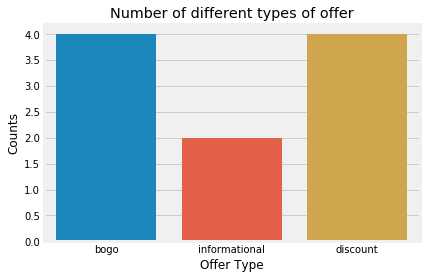

In [8]:
sns.countplot(portfolio['offer_type'])
plt.title('Number of different types of offer')
plt.ylabel('Counts')
plt.xlabel('Offer Type')
plt.show()

##  2. Profile.json

The second file contains customer demographic data including their age, gender, income, and when they created an account on the Starbucks rewards mobile application.

* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

In [9]:
profile.head()

gender  age                                id  became_member_on    income
0   None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2   None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712       NaN
3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
4   None  118  a03223e636434f42ac4c3df47e8bac43          20170804       NaN

In [10]:
def profile_cleaning(profile):
    '''
    Function to clean profile dataframe
    
    INPUT:
    profile - uncleaned profile dataframe
    
    OUTPUT:
    profile - cleaned profile dataframe
    
    '''
    # Replacing 118 years age with NaN
    profile['age'] = profile['age'].apply(lambda x: np.nan if x == 118 else x)
    
    # Removing all the missing values 
    profile.dropna(subset=['age'], inplace=True)
    
    # Creating a new column from "became_member_on" indicating the number of days since the user is a member of starbucks
    profile['memberdays'] = datetime.datetime.today().date() - pd.to_datetime(profile['became_member_on'], format='%Y%m%d').dt.date
    profile['memberdays'] = profile['memberdays'].dt.days
    
    return profile

In [11]:
profile_cleaned = profile_cleaning(profile)
profile_cleaned.head()

gender   age                                id  became_member_on    income  \
1       F  55.0  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0   
3       F  75.0  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0   
5       M  68.0  e2127556f4f64592b11af22de27a7932          20180426   70000.0   
8       M  65.0  389bc3fa690240e798340f5a15918d5c          20180209   53000.0   
12      M  58.0  2eeac8d8feae4a8cad5a6af0499a211d          20171111   51000.0   

    memberdays  
1         1042  
3         1109  
5          757  
8          833  
12         923

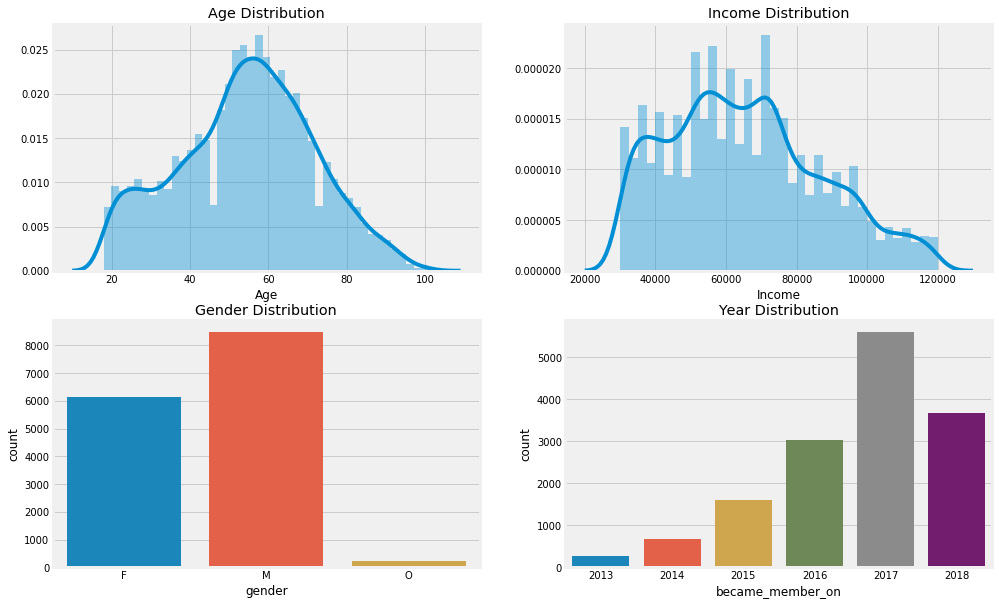

In [12]:
# to be able to draw three subplots in a row
fig, ax = plt.subplots(figsize=(15, 10), nrows=2, ncols=2)

# plot a age distribution
plt.sca(ax[0,0])
sns.distplot(profile_cleaned.age)
plt.xlabel('Age')
plt.title('Age Distribution')

# plot a income distribution
plt.sca(ax[0,1])
sns.distplot(profile_cleaned.income)
plt.xlabel('Income')
plt.title('Income Distribution')

plt.sca(ax[1,0])
sns.countplot(profile_cleaned.gender)
plt.title('Gender Distribution')

plt.sca(ax[1,1])
sns.countplot(profile_cleaned['became_member_on'].astype(str).astype('datetime64[ns]').dt.year)
plt.title('Year Distribution')
plt.show()

<Figure size 432x288 with 0 Axes>

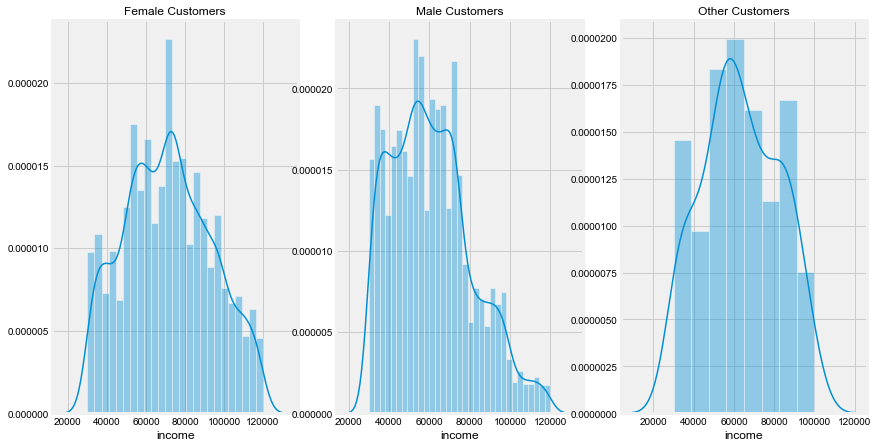

In [13]:
male_customers = profile_cleaned[profile_cleaned['gender'] == "M"]
female_customers = profile_cleaned[profile_cleaned['gender'] == 'F']
other_customers = profile_cleaned[profile_cleaned['gender'] == 'O']

plt.figure()
fig, ax = plt.subplots(1,3, figsize=(12, 6))
fig.tight_layout()
sns.set(style="darkgrid")
sns.FacetGrid
sns.distplot(female_customers['income'], ax=ax[0]).set(title = 'Female Customers')
sns.distplot(male_customers['income'], ax=ax[1]).set(title = 'Male Customers')
sns.distplot(other_customers['income'], ax=ax[2]).set(title = 'Other Customers')
plt.show()

## 3 .Transcript.json

The third file describes customer purchases and when they received, viewed, and completed an offer. An offer is only successful when a customer both views an offer and meets or exceeds its difficulty within the offer's duration.

- Records for transactions, offers received, offers viewed, and offers completed.
- event (str) - record description (ie transaction, offer received, offer viewed, etc.)
- person (str) - customer id
- time (int) - time in hours since the start of the test. The data begins at time t=0
- value - (dict of strings) - either an offer id or transaction amount depending on the record


In [14]:
transcript.head(4)

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0

In [15]:
transcript.shape

(306534, 4)

In [16]:
def offer_id(dataset):
    offer = 0
    if "offer id" in dataset:
        offer = dataset["offer id"]
    elif "offer_id" in dataset:
        offer = dataset["offer_id"]
    return offer

def amount(dataset):
    amount = 0
    if "amount" in dataset:
        amount = dataset["amount"]
    return amount

transcript["offer_id"] = transcript["value"].apply(lambda x: offer_id(x))
transcript["amount_spent"] = transcript["value"].apply(lambda x: amount(x))
transcript['time'] = transcript['time']/24.0

In [17]:
event_type = pd.get_dummies(transcript.event)
transcript = transcript.join(event_type)
transcript.drop(columns="value", inplace=True)

In [18]:
transcript[transcript.event =="offer completed"].head()

person            event  time  \
12658  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  offer completed   0.0   
12672  fe97aa22dd3e48c8b143116a8403dd52  offer completed   0.0   
12679  629fc02d56414d91bca360decdfa9288  offer completed   0.0   
12692  676506bad68e4161b9bbaffeb039626b  offer completed   0.0   
12697  8f7dd3b2afe14c078eb4f6e6fe4ba97d  offer completed   0.0   

                               offer_id  amount_spent  offer completed  \
12658  2906b810c7d4411798c6938adc9daaa5           0.0                1   
12672  fafdcd668e3743c1bb461111dcafc2a4           0.0                1   
12679  9b98b8c7a33c4b65b9aebfe6a799e6d9           0.0                1   
12692  ae264e3637204a6fb9bb56bc8210ddfd           0.0                1   
12697  4d5c57ea9a6940dd891ad53e9dbe8da0           0.0                1   

       offer received  offer viewed  transaction  
12658               0             0            0  
12672               0             0            0  
12679               0             0            0  
12692               0             0            0  
12697               0             0            0

In [19]:
len(transcript.person.unique())

17000

In [20]:
def transaction_cleaning(transcript, num_customers):
    
    #Get the unique customer ids
    customer_ids_list = list(transcript.person.unique())
    
    #Create a dataframe wich we will populate below: 
    transactions_df = pd.DataFrame(columns= ['person', 'offer_id', 'time', 'offer_received', 'offer_viewed',
                                         'offer_completed', 'offer_successful', 'transaction', 'amount_spent'])
    
    #Create an empty dataframe 
    customer_df = pd.DataFrame()
    
    offer_start_time = 0
    
    for customer_id in customer_ids_list[:num_customers]:
    
        
        #Get the transcript info about the customer 
        customer_df = transcript[transcript.person == customer_id]
        
        #Get the list of orders this customer received/viewed/completed/transaction 
        offers_id_list = customer_df.offer_id
        offers_id_list = offers_id_list.drop_duplicates()
        #offers_id_list = [x for x in offers_id_list if pd.notnull(x)]

        for offer_id in offers_id_list:
            
            # Fill in dataframe of  a particular customer and for offers 
            customer_df_1 = customer_df[(customer_df['person'] == customer_id) & (customer_df['offer_id']== offer_id)]
            
            #Collect time when the customer completed the offer
            cur_time_days = customer_df_1.loc[:,'time'].max() 
            
            #Collect event's info: offer received, offer viewed, and offer completed.
            offer_completed = customer_df_1.loc[:,'offer completed'].max()
            offer_received = customer_df_1.loc[:,'offer received'].max()
            offer_viewed = customer_df_1.loc[:,'offer viewed'].max()
        
    
            #Get transaction and money spent on the offer if available.
            customer_transaction_df = customer_df[customer_df['person'] == customer_id]
            cur_time_transaction = customer_transaction_df[(customer_transaction_df['time']> offer_start_time) & (customer_transaction_df['time']<= cur_time_days)]
            amount_spent = cur_time_transaction.loc[:,'amount_spent'].sum()
            
            #Transaction done or not 
            if (amount_spent):
                transaction_done=1
            else:
                transaction_done=0
      
            offer_start_time = cur_time_days
        
            if (offer_received and offer_viewed and offer_completed): 
                offer_successful = 1
            else:
                offer_successful = 0
            
            if (cur_time_days >= 0):
                transactions_df = transactions_df.append({'person': customer_id, 'offer_id': offer_id, 'time': cur_time_days,
                                                'offer_received': offer_received, 'offer_viewed': offer_viewed, 'offer_completed': offer_completed,
                                                'offer_successful': offer_successful,'transaction':transaction_done, 'amount_spent':amount_spent}, ignore_index=True)
                  
    return transactions_df
   

In [21]:
transcript_cleaned = transaction_cleaning(transcript,17000)
transcript_cleaned

person                          offer_id  \
0      78afa995795e4d85b5d9ceeca43f5fef  9b98b8c7a33c4b65b9aebfe6a799e6d9   
1      78afa995795e4d85b5d9ceeca43f5fef                                 0   
2      78afa995795e4d85b5d9ceeca43f5fef  5a8bc65990b245e5a138643cd4eb9837   
3      78afa995795e4d85b5d9ceeca43f5fef  ae264e3637204a6fb9bb56bc8210ddfd   
4      78afa995795e4d85b5d9ceeca43f5fef  f19421c1d4aa40978ebb69ca19b0e20d   
...                                 ...                               ...   
79861  ebae5093b436466c9fbd097cb7434023                                 0   
79862  ebae5093b436466c9fbd097cb7434023  fafdcd668e3743c1bb461111dcafc2a4   
79863  912b9f623b9e4b4eb99b6dc919f09a93  4d5c57ea9a6940dd891ad53e9dbe8da0   
79864  3045af4e98794a04a5542d3eac939b1f  4d5c57ea9a6940dd891ad53e9dbe8da0   
79865  da7a7c0dcfcb41a8acc7864a53cf60fb                                 0   

        time offer_received offer_viewed offer_completed offer_successful  \
0       5.50              1            1               1                1   
1      22.25              0            0               0                0   
2       9.00              1            1               0                0   
3      21.25              1            1               1                1   
4      24.25              1            1               1                1   
...      ...            ...          ...             ...              ...   
79861  27.50              0            0               0                0   
79862  27.50              1            1               1                1   
79863  24.75              1            1               0                0   
79864  24.00              1            1               0                0   
79865  24.25              0            0               0                0   

      transaction  amount_spent  
0               1         19.89  
1               1        139.38  
2               0          0.00  
3               1         95.04  
4               1         26.56  
...           ...           ...  
79861           1         12.64  
79862           0          0.00  
79863           0          0.00  
79864           0          0.00  
79865           1          0.35  

[79866 rows x 9 columns]

## <a id = '3'> 3. COMBINE THE THREE FILES </a>

In [22]:
# Merging the data frames
temp_merged = transcript_cleaned.merge(profile_cleaned, how="inner", left_on="person", right_on="id")

In [23]:
temp_merged.drop("id", inplace=True, axis=1)

In [24]:
temp_merged = temp_merged.merge(portfolio_cleaned, how="left", left_on="offer_id", right_on="offer_id")


In [34]:
temp_merged.head()

person                          offer_id   time  \
0  78afa995795e4d85b5d9ceeca43f5fef  9b98b8c7a33c4b65b9aebfe6a799e6d9   5.50   
1  78afa995795e4d85b5d9ceeca43f5fef                                 0  22.25   
2  78afa995795e4d85b5d9ceeca43f5fef  5a8bc65990b245e5a138643cd4eb9837   9.00   
3  78afa995795e4d85b5d9ceeca43f5fef  ae264e3637204a6fb9bb56bc8210ddfd  21.25   
4  78afa995795e4d85b5d9ceeca43f5fef  f19421c1d4aa40978ebb69ca19b0e20d  24.25   

  offer_received offer_viewed offer_completed offer_successful transaction  \
0              1            1               1                1           1   
1              0            0               0                0           1   
2              1            1               0                0           0   
3              1            1               1                1           1   
4              1            1               1                1           1   

   amount_spent gender  ...  difficulty  duration     offer_type  bogo  \
0         19.89      F  ...         5.0       7.0           bogo   1.0   
1        139.38      F  ...         NaN       NaN            NaN   NaN   
2          0.00      F  ...         0.0       3.0  informational   0.0   
3         95.04      F  ...        10.0       7.0           bogo   1.0   
4         26.56      F  ...         5.0       5.0           bogo   1.0   

   discount  informational  email mobile  social  web  
0       0.0            0.0    1.0    1.0     0.0  1.0  
1       NaN            NaN    NaN    NaN     NaN  NaN  
2       0.0            1.0    1.0    1.0     1.0  0.0  
3       0.0            0.0    1.0    1.0     1.0  0.0  
4       0.0            0.0    1.0    1.0     1.0  1.0  

[5 rows x 25 columns]

## <a id = '4'> 4. ANALYSIS OF DATA BASED ON  DEMOGRAPHICS </a>

There are three types of offers:

1. BOGO
2. Discount 
3. Informal

In this project we have to find out which type of offers suitable for  the demographic groups based on their age, income and gender.

- There is no offer id available for offers which are completed or on which customer performed transaction. 
-  So for the first part, we will only deal with offer received and offer viewed.

In [47]:
# Merge transcript and profile to get age, gender and income in transcript dataset:
temp_df1 = transcript.merge(profile, left_on="person", right_on="id", how = 'left')#.drop(columns =["became_member_on"] )

In [51]:
# Merge transcript and profile to get age, gender and income in transcript dataset:
temp_df2 = temp_df1.merge(portfolio, left_on="offer_id", right_on= "id", how = 'left')

In [56]:
temp_df2.drop(["id_x","id_y"], axis=1,inplace=True)

In [57]:
# Create age range and income range for better understanding of data distributionCreate age groups 
bins = [20, 30, 40, 50, 60, 70, 80, 90 ,120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-90','90+']
temp_df2['age_range'] = pd.cut(temp_df2.age, bins, labels = labels,include_lowest = True)

bins_income = [20000,30000,40000,50000,60000,70000,80000,90000,100000]
labels_income = ['20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','80k-90k','90k-100k','100k+']
temp_df2['income_range'] = pd.cut(temp_df2.income, bins_income, labels = labels_income,include_lowest = True)

In [59]:
temp_df2

person           event   time  \
0       78afa995795e4d85b5d9ceeca43f5fef  offer received   0.00   
1       a03223e636434f42ac4c3df47e8bac43  offer received   0.00   
2       e2127556f4f64592b11af22de27a7932  offer received   0.00   
3       8ec6ce2a7e7949b1bf142def7d0e0586  offer received   0.00   
4       68617ca6246f4fbc85e91a2a49552598  offer received   0.00   
...                                  ...             ...    ...   
306529  b3a1272bc9904337b331bf348c3e8c17     transaction  29.75   
306530  68213b08d99a4ae1b0dcb72aebd9aa35     transaction  29.75   
306531  a00058cf10334a308c68e7631c529907     transaction  29.75   
306532  76ddbd6576844afe811f1a3c0fbb5bec     transaction  29.75   
306533  c02b10e8752c4d8e9b73f918558531f7     transaction  29.75   

                                offer_id  amount_spent  offer completed  \
0       9b98b8c7a33c4b65b9aebfe6a799e6d9          0.00                0   
1       0b1e1539f2cc45b7b9fa7c272da2e1d7          0.00                0   
2       2906b810c7d4411798c6938adc9daaa5          0.00                0   
3       fafdcd668e3743c1bb461111dcafc2a4          0.00                0   
4       4d5c57ea9a6940dd891ad53e9dbe8da0          0.00                0   
...                                  ...           ...              ...   
306529                                 0          1.59                0   
306530                                 0          9.53                0   
306531                                 0          3.61                0   
306532                                 0          3.53                0   
306533                                 0          4.05                0   

        offer received  offer viewed  transaction gender  ...  \
0                    1             0            0      F  ...   
1                    1             0            0    NaN  ...   
2                    1             0            0      M  ...   
3                    1             0            0    NaN  ...   
4                    1             0            0    NaN  ...   
...                ...           ...          ...    ...  ...   
306529               0             0            1      M  ...   
306530               0             0            1      M  ...   
306531               0             0            1      F  ...   
306532               0             0            1      M  ...   
306533               0             0            1    NaN  ...   

        became_member_on    income  memberdays  reward  \
0             20170509.0  100000.0      1109.0     5.0   
1                    NaN       NaN         NaN     5.0   
2             20180426.0   70000.0       757.0     2.0   
3                    NaN       NaN         NaN     2.0   
4                    NaN       NaN         NaN    10.0   
...                  ...       ...         ...     ...   
306529        20180101.0   47000.0       872.0     NaN   
306530        20180408.0   62000.0       775.0     NaN   
306531        20130922.0   52000.0      2434.0     NaN   
306532        20160709.0   40000.0      1413.0     NaN   
306533               NaN       NaN         NaN     NaN   

                            channels difficulty  duration  offer_type  \
0               [web, email, mobile]        5.0       7.0        bogo   
1                       [web, email]       20.0      10.0    discount   
2               [web, email, mobile]       10.0       7.0    discount   
3       [web, email, mobile, social]       10.0      10.0    discount   
4       [web, email, mobile, social]       10.0       5.0        bogo   
...                              ...        ...       ...         ...   
306529                           NaN        NaN       NaN         NaN   
306530                           NaN        NaN       NaN         NaN   
306531                           NaN        NaN       NaN         NaN   
306532                           NaN        NaN       NaN         NaN   
306533                           NaN        NaN

In [61]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot

labels = ["Male","Female","Other"]
colors = ['pink', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = make_subplots(rows=3, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
                                          [{'type':'domain'}, {'type':'domain'},{'type':'domain'}],
                                           [{'type':'domain'}, {'type':'domain'},{'type':'domain'}]],
      subplot_titles=["BOGO-(Offer Received)","BOGO-(Offer Viewed)","BOGO-(Offer Completed)",
                      "Discount-(Offer Received)","Discount-(Offer Viewed)","Discount-(Offer Completed)",
                      "Informational-(Offer Received)","Informational-(Offer Viewed)","Informational-(Offer Completed)",

                     ])

fig.add_trace(go.Pie(labels=labels, values=temp_df2[(temp_df2.offer_type=="bogo")&(temp_df2.event=="offer received")].gender.value_counts(),name="BOGO-Offer-Received"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=temp_df2[(temp_df2.offer_type=="bogo")&(temp_df2.event=="offer viewed")].gender.value_counts(), name="BOGO-Offer-Viewed"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=temp_df2[(temp_df2.offer_type=="bogo")&(temp_df2.event=="offer completed")].gender.value_counts(), name="BOGO-Offer-Completed"),
              1, 3)


fig.add_trace(go.Pie(labels=labels, values=temp_df2[(temp_df2.offer_type=="discount")&(temp_df2.event=="offer received")].gender.value_counts(), name="Discount-Offer-Received"),
              2, 1)
fig.add_trace(go.Pie(labels=labels, values=temp_df2[(temp_df2.offer_type=="discount")&(temp_df2.event=="offer viewed")].gender.value_counts(), name="Discount-Offer-Viewed"),
              2, 2)
fig.add_trace(go.Pie(labels=labels, values=temp_df2[(temp_df2.offer_type=="discount")&(temp_df2.event=="offer completed")].gender.value_counts(), name="Discount-Offer-Completed"),
              2, 3)


fig.add_trace(go.Pie(labels=labels, values=temp_df2[(temp_df2.offer_type=="informational")&(temp_df2.event=="offer received")].gender.value_counts(), name="Informational-Offer-Received"),
              3, 1)
fig.add_trace(go.Pie(labels=labels, values=temp_df2[(temp_df2.offer_type=="informational")&(temp_df2.event=="offer viewed")].gender.value_counts(), name="Informational-Offer-Viewed"),
              3, 2)
fig.add_trace(go.Pie(labels=labels, values=temp_df2[(temp_df2.offer_type=="infromational")&(temp_df2.event=="offer completed")].gender.value_counts(), name="GHG Emissions"),
              3, 3)

fig.update_traces( textfont_size=10,marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(autosize=False, width=1000, height=1000)

fig.show()

## 1. BOGO- buy one and get one offer, age and Gender (offer received and offer viewed):

### Age 

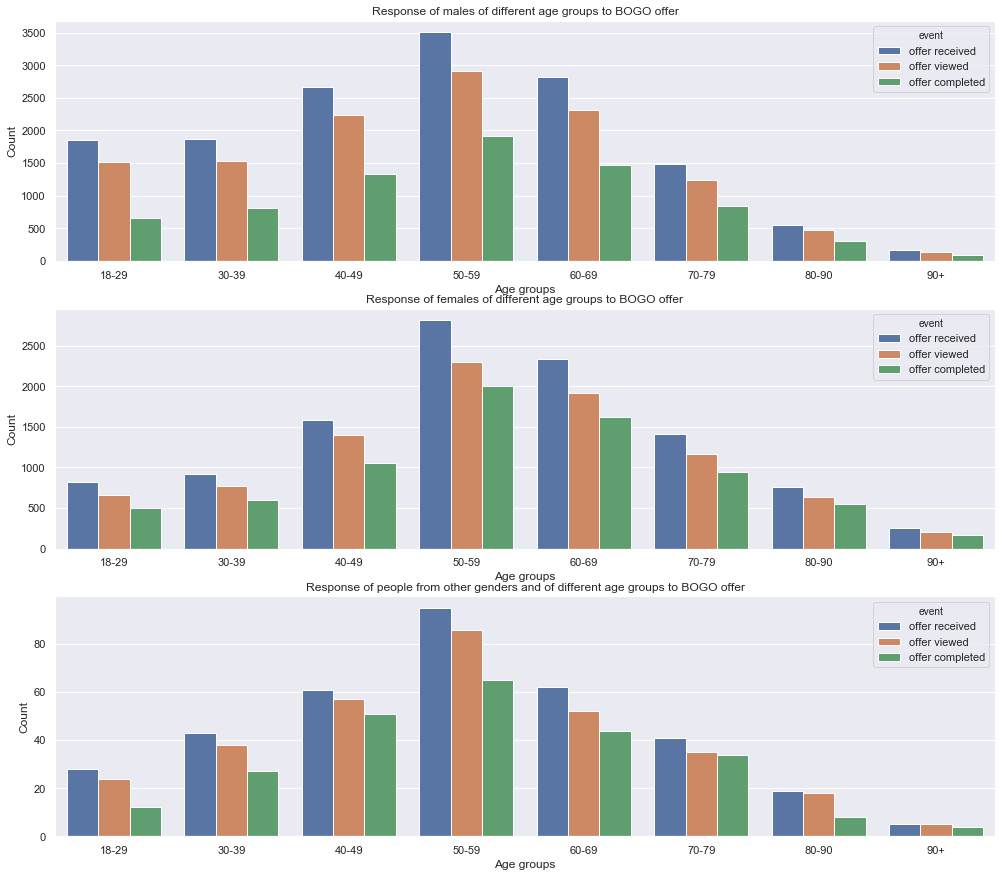

In [63]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

sns.countplot(x = "age_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="bogo")&(temp_df2.gender=='M')],ax=ax1)
ax1.set(ylabel='Count', xlabel='Age groups')
ax1.set_title("Response of males of different age groups to BOGO offer")


sns.countplot(x = "age_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="bogo")&(temp_df2.gender=='F')],ax=ax2)
ax2.set(ylabel='Count', xlabel='Age groups')
ax2.set_title("Response of females of different age groups to BOGO offer")


sns.countplot(x = "age_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="bogo")&(temp_df2.gender=='O')],ax=ax3)
ax3.set(ylabel='Count', xlabel='Age groups')
ax3.set_title("Response of people from other genders and of different age groups to BOGO offer")
plt.show()

In [64]:
print("How many customers (age groupwise) completed BOGO offers (in %) who received them??")
for i in ["M","F","O"]:
    bogo_offer_received = temp_df2[(temp_df2.offer_type=="bogo")&(temp_df2.gender==i)&(temp_df2.event=='offer received')].age_range.value_counts()
    bogo_offer_completed= temp_df2[(temp_df2.offer_type=="bogo")&(temp_df2.gender==i)&(temp_df2.event=='offer completed')].age_range.value_counts() 
    print("Gneder:",i)
    print((bogo_offer_completed/bogo_offer_received)*100)

How many customers (age groupwise) completed BOGO offers (in %) who received them??
Gneder: M
18-29    35.351351
30-39    43.176972
40-49    50.187829
50-59    54.804676
60-69    51.913536
70-79    56.346541
80-90    55.818182
90+      53.797468
Name: age_range, dtype: float64
Gneder: F
18-29    61.491443
30-39    65.864333
40-49    66.897856
50-59    71.114265
60-69    69.451585
70-79    66.902405
80-90    72.655218
90+      67.611336
Name: age_range, dtype: float64
Gneder: O
18-29    42.857143
30-39    62.790698
40-49    83.606557
50-59    68.421053
60-69    70.967742
70-79    82.926829
80-90    42.105263
90+      80.000000
Name: age_range, dtype: float64


### Income

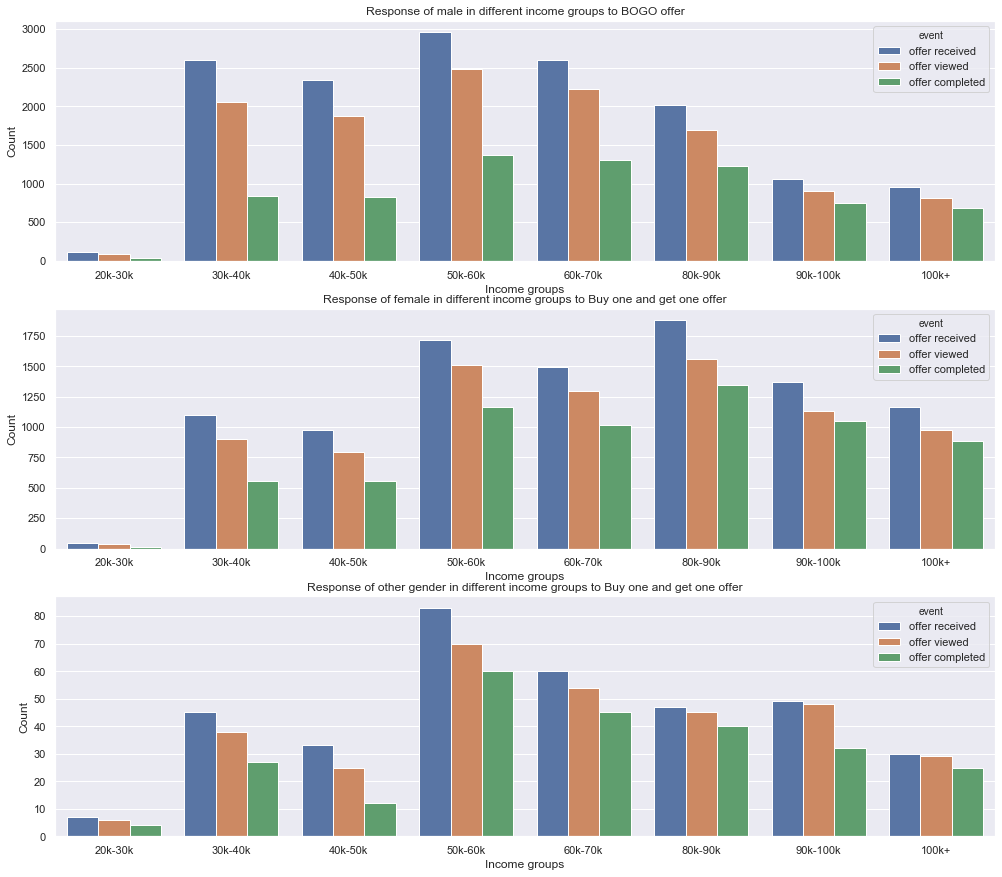

In [66]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

sns.countplot(x = "income_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="bogo")&(temp_df2.gender=='M')],ax=ax1)
ax1.set(ylabel='Count', xlabel='Income groups')
ax1.set_title("Response of male in different income groups to BOGO offer")


sns.countplot(x = "income_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="bogo")&(temp_df2.gender=='F')],ax=ax2)
ax2.set(ylabel='Count', xlabel='Income groups')
ax2.set_title("Response of female in different income groups to Buy one and get one offer")


sns.countplot(x = "income_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="bogo")&(temp_df2.gender=='O')],ax=ax3)
ax3.set(ylabel='Count', xlabel='Income groups')
ax3.set_title("Response of other gender in different income groups to Buy one and get one offer")
plt.show()

In [67]:
print("How many customers (Income and gender groupwise) completed BOGO offers (in %) who received them??")
for i in ["M","F","O"]:
    bogo_offer_received = temp_df2[(temp_df2.offer_type=="bogo")&(temp_df2.gender==i)&(temp_df2.event=='offer received')].income_range.value_counts()
    bogo_offer_completed= temp_df2[(temp_df2.offer_type=="bogo")&(temp_df2.gender==i)&(temp_df2.event=='offer completed')].income_range.value_counts() 
    #print(i,":How many customers completed BOGO offers (in %) who received them.")
    print(i)
    print((bogo_offer_completed/bogo_offer_received)*100)

How many customers (Income and gender groupwise) completed BOGO offers (in %) who received them??
M
20k-30k     33.620690
30k-40k     32.486528
40k-50k     35.445205
50k-60k     46.416498
60k-70k     50.250482
80k-90k     61.102832
90k-100k    70.750237
100k+       72.268908
Name: income_range, dtype: float64
F
20k-30k     31.818182
30k-40k     50.774840
40k-50k     57.055215
50k-60k     67.792662
60k-70k     68.008048
80k-90k     71.580628
90k-100k    76.440554
100k+       76.227390
Name: income_range, dtype: float64
O
20k-30k     57.142857
30k-40k     60.000000
40k-50k     36.363636
50k-60k     72.289157
60k-70k     75.000000
80k-90k     85.106383
90k-100k    65.306122
100k+       83.333333
Name: income_range, dtype: float64


## 2. Discount offer , age and Gender (offer received and offer viewed):

### Age

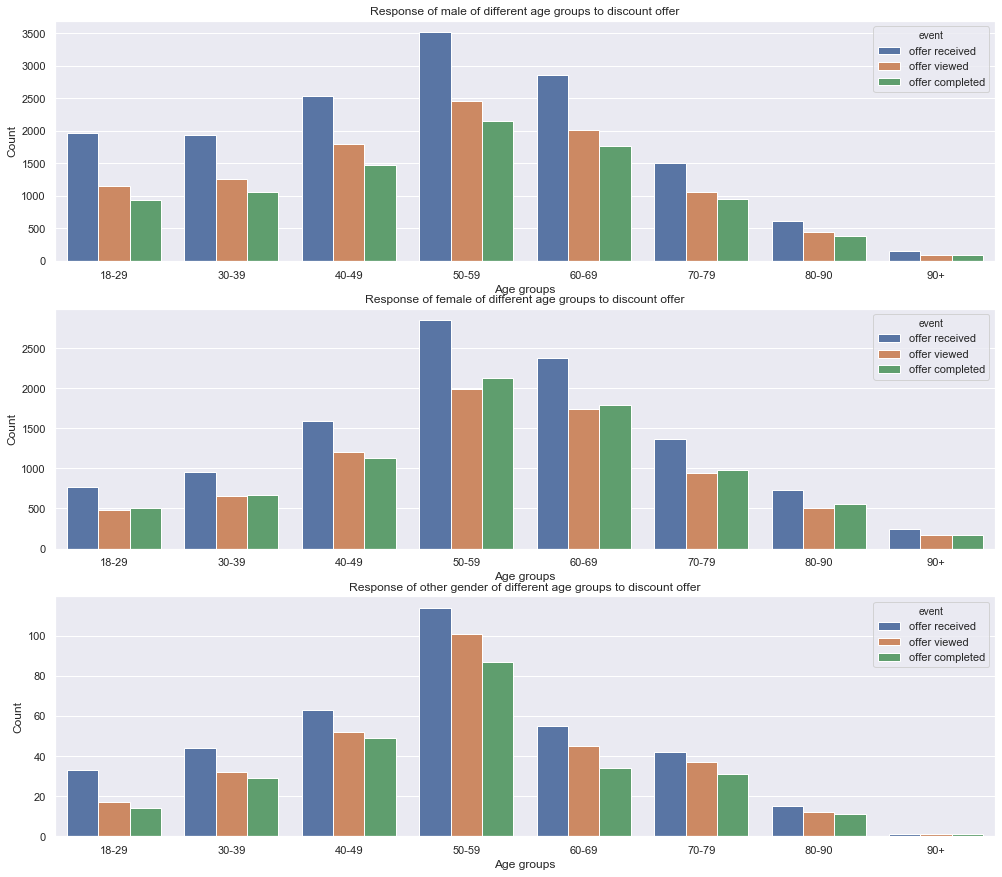

In [68]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

sns.countplot(x = "age_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="discount")&(temp_df2.gender=='M')],ax=ax1)
ax1.set(ylabel='Count', xlabel='Age groups')
ax1.set_title("Response of male of different age groups to discount offer")


sns.countplot(x = "age_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="discount")&(temp_df2.gender=='F')],ax=ax2)
ax2.set(ylabel='Count', xlabel='Age groups')
ax2.set_title("Response of female of different age groups to discount offer")


sns.countplot(x = "age_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="discount")&(temp_df2.gender=='O')],ax=ax3)
ax3.set(ylabel='Count', xlabel='Age groups')
ax3.set_title("Response of other gender of different age groups to discount offer")
plt.show()

In [69]:
print("How many customers (age groupwise) completed discount offers (in %) who received them??")
for i in ["M","F","O"]:
    discount_offer_received = temp_df2[(temp_df2.offer_type=="discount")&(temp_df2.gender==i)&(temp_df2.event=='offer received')].age_range.value_counts()
    discount_offer_completed= temp_df2[(temp_df2.offer_type=="discount")&(temp_df2.gender==i)&(temp_df2.event=='offer completed')].age_range.value_counts() 
    #print(i,":How many customers completed discount offers (in %) who received them.")
    print(i)
    print((discount_offer_completed/discount_offer_received)*100)

How many customers (age groupwise) completed discount offers (in %) who received them??
M
18-29    47.413793
30-39    54.254771
40-49    58.336618
50-59    61.114269
60-69    61.729692
70-79    63.346614
80-90    63.322368
90+      62.837838
Name: age_range, dtype: float64
F
18-29    66.492147
30-39    70.397490
40-49    71.050975
50-59    74.649369
60-69    75.336700
70-79    71.970803
80-90    75.790922
90+      72.689076
Name: age_range, dtype: float64
O
18-29     42.424242
30-39     65.909091
40-49     77.777778
50-59     76.315789
60-69     61.818182
70-79     73.809524
80-90     73.333333
90+      100.000000
Name: age_range, dtype: float64


### Income

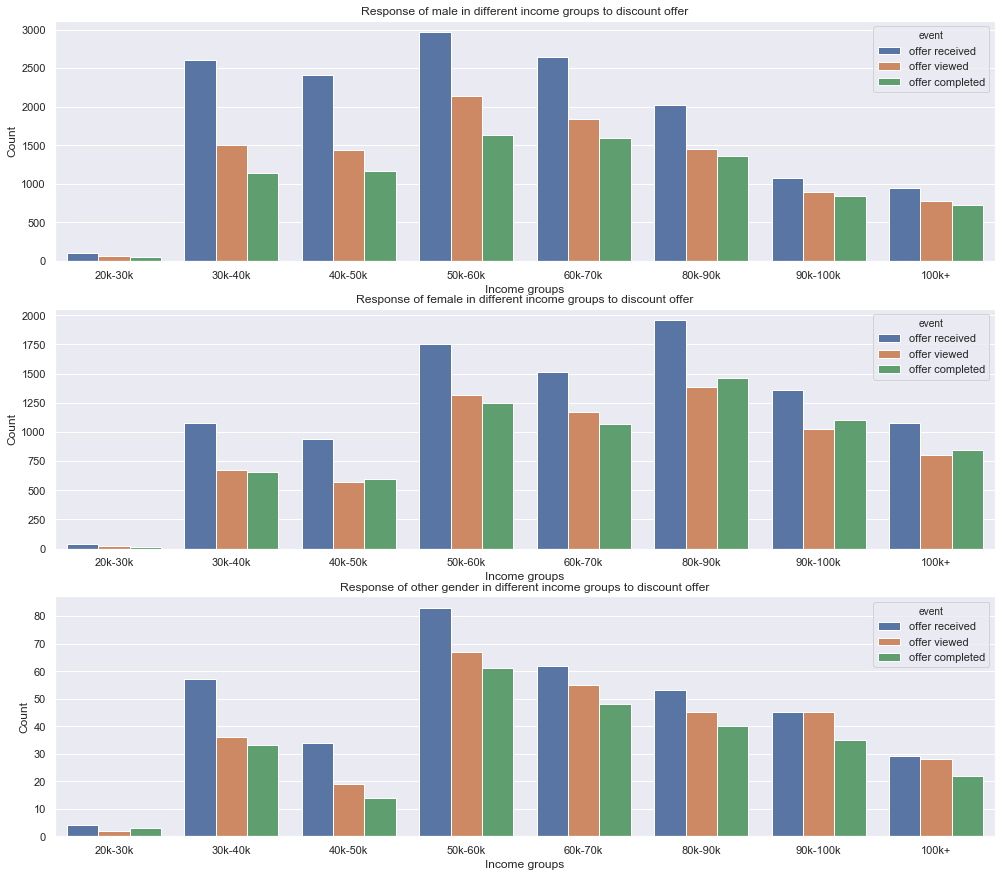

In [70]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

sns.countplot(x = "income_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="discount")&(temp_df2.gender=='M')],ax=ax1)
ax1.set(ylabel='Count', xlabel='Income groups')
ax1.set_title("Response of male in different income groups to discount offer")


sns.countplot(x = "income_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="discount")&(temp_df2.gender=='F')],ax=ax2)
ax2.set(ylabel='Count', xlabel='Income groups')
ax2.set_title("Response of female in different income groups to discount offer")


sns.countplot(x = "income_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="discount")&(temp_df2.gender=='O')],ax=ax3)
ax3.set(ylabel='Count', xlabel='Income groups')
ax3.set_title("Response of other gender in different income groups to discount offer")
plt.show()

In [71]:
print("How many customers (Income groupwise) completed dicount offers (in %) who received them??")
for i in ["M","F","O"]:
    discount_offer_received = temp_df2[(temp_df2.offer_type=="discount")&(temp_df2.gender==i)&(temp_df2.event=='offer received')].income_range.value_counts()
    discount_offer_completed= temp_df2[(temp_df2.offer_type=="discount")&(temp_df2.gender==i)&(temp_df2.event=='offer completed')].income_range.value_counts() 
    print(i)
    print((discount_offer_completed/discount_offer_received)*100)

How many customers (Income groupwise) completed dicount offers (in %) who received them??
M
20k-30k     44.660194
30k-40k     43.812452
40k-50k     48.076127
50k-60k     55.143339
60k-70k     60.090703
80k-90k     67.209073
90k-100k    77.871148
100k+       76.139979
Name: income_range, dtype: float64
F
20k-30k     34.146341
30k-40k     61.173184
40k-50k     64.102564
50k-60k     71.363377
60k-70k     70.860927
80k-90k     74.463739
90k-100k    81.208548
100k+       78.148148
Name: income_range, dtype: float64
O
20k-30k     75.000000
30k-40k     57.894737
40k-50k     41.176471
50k-60k     73.493976
60k-70k     77.419355
80k-90k     75.471698
90k-100k    77.777778
100k+       75.862069
Name: income_range, dtype: float64


## 3. Informational offer , age and Gender (offer received and offer viewed):

### Age

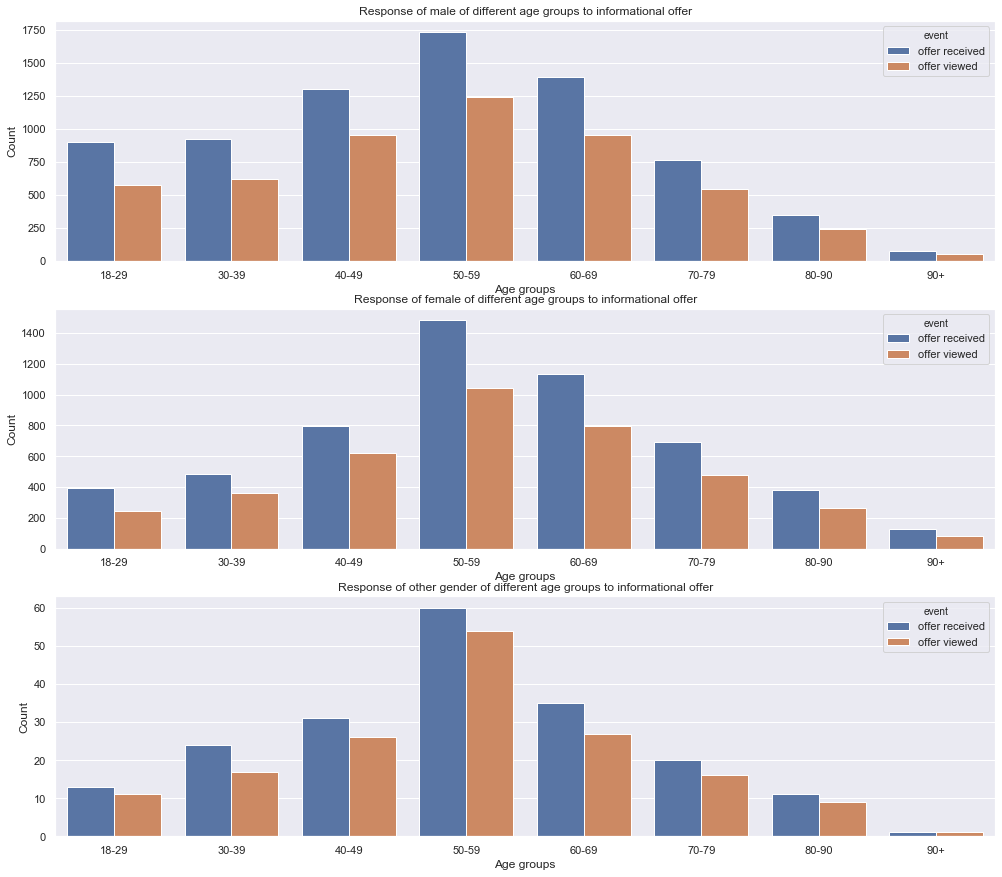

In [72]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

sns.countplot(x = "age_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="informational")&(temp_df2.gender=='M')],ax=ax1)
ax1.set(ylabel='Count', xlabel='Age groups')
ax1.set_title("Response of male of different age groups to informational offer")


sns.countplot(x = "age_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="informational")&(temp_df2.gender=='F')],ax=ax2)
ax2.set(ylabel='Count', xlabel='Age groups')
ax2.set_title("Response of female of different age groups to informational offer")


sns.countplot(x = "age_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="informational")&(temp_df2.gender=='O')],ax=ax3)
ax3.set(ylabel='Count', xlabel='Age groups')
ax3.set_title("Response of other gender of different age groups to informational offer")
plt.show()

In [73]:
print("How many customers (age groupwise) completed informal offers (in %) who received them??")
for i in ["M","F","O"]:
    informational_offer_received = temp_df2[(temp_df2.offer_type=="informational")&(temp_df2.gender==i)&(temp_df2.event=='offer received')].age_range.value_counts()
    informational_offer_viewed= temp_df2[(temp_df2.offer_type=="informational")&(temp_df2.gender==i)&(temp_df2.event=='offer viewed')].age_range.value_counts() 
    print(i)
    print(np.mean(informational_offer_viewed/informational_offer_received))

How many customers (age groupwise) completed informal offers (in %) who received them??
M
0.6940148583446296
F
0.6925834574518813
O
0.8353509058146155


## Income 

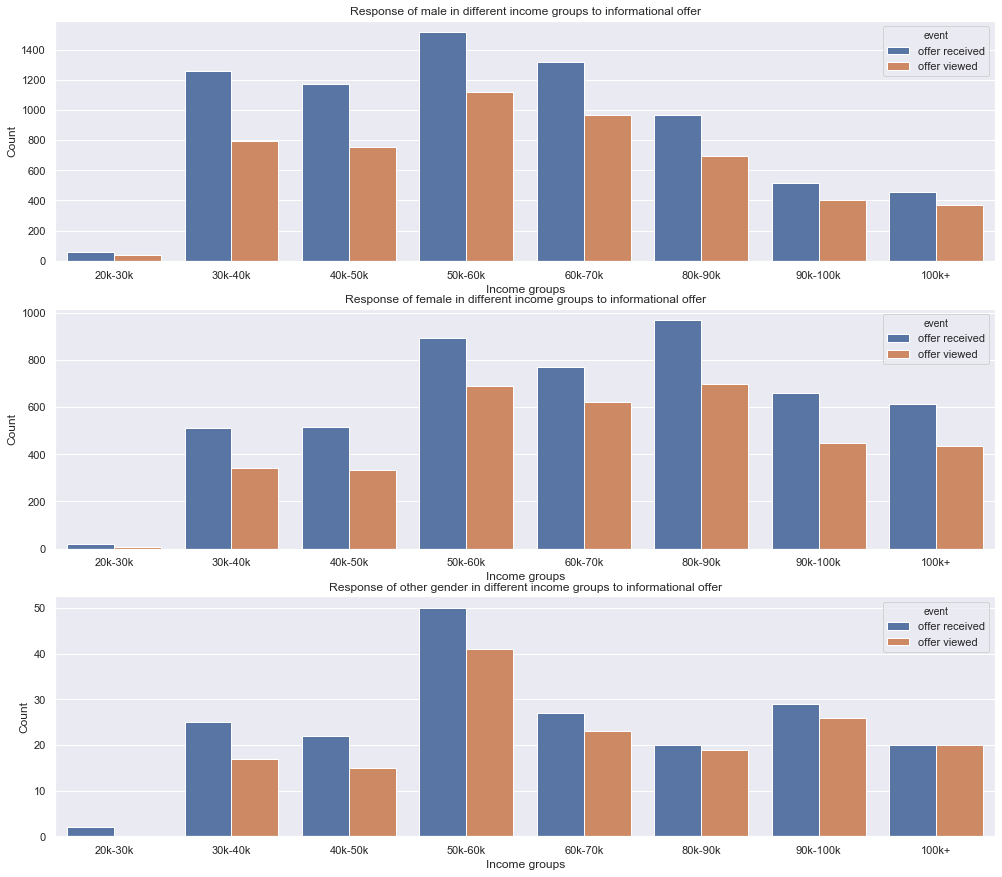

In [74]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

sns.countplot(x = "income_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="informational")&(temp_df2.gender=='M')],ax=ax1)
ax1.set(ylabel='Count', xlabel='Income groups')
ax1.set_title("Response of male in different income groups to informational offer")


sns.countplot(x = "income_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="informational")&(temp_df2.gender=='F')],ax=ax2)
ax2.set(ylabel='Count', xlabel='Income groups')
ax2.set_title("Response of female in different income groups to informational offer")


sns.countplot(x = "income_range",hue= "event",data = temp_df2[(temp_df2.offer_type=="informational")&(temp_df2.gender=='O')],ax=ax3)
ax3.set(ylabel='Count', xlabel='Income groups')
ax3.set_title("Response of other gender in different income groups to informational offer")
plt.show()

In [75]:
print("How many customers (Income groupwise) completed informational offers (in %) who received them??")
for i in ["M","F","O"]:
    informational_offer_received = temp_df2[(temp_df2.offer_type=="informational")&(temp_df2.gender==i)&(temp_df2.event=='offer received')].income_range.value_counts()
    informational_offer_viewed= temp_df2[(temp_df2.offer_type=="informational")&(temp_df2.gender==i)&(temp_df2.event=='offer viewed')].income_range.value_counts() 
    print(i)
    print((informational_offer_viewed/informational_offer_received)*100)

How many customers (Income groupwise) completed informational offers (in %) who received them??
M
50k-60k     73.778071
60k-70k     73.085671
30k-40k     63.095238
40k-50k     64.109122
80k-90k     71.458118
90k-100k    78.599222
100k+       80.131004
20k-30k     67.241379
Name: income_range, dtype: float64
F
20k-30k     38.095238
30k-40k     66.861598
40k-50k     64.466019
50k-60k     77.441077
60k-70k     80.415045
80k-90k     71.826625
90k-100k    68.237082
100k+       70.569106
Name: income_range, dtype: float64
O
20k-30k       0.000000
30k-40k      68.000000
40k-50k      68.181818
50k-60k      82.000000
60k-70k      85.185185
80k-90k      95.000000
90k-100k     89.655172
100k+       100.000000
Name: income_range, dtype: float64


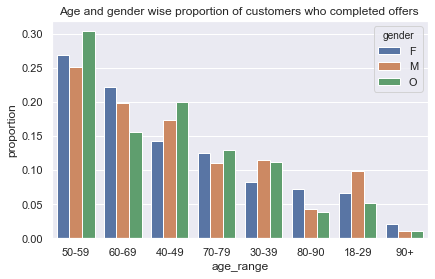

In [76]:
df = temp_df2[(temp_df2.event=="offer completed")&(temp_df2.age<=100)]
x, y, hue = "age_range", "proportion", "gender"
hue_order = ["M", "F",'O','X']

(df[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index()
.pipe((sns.barplot, "data"), x=x, y=y, hue=hue))
plt.title("Age and gender wise proportion of customers who completed offers " )
plt.show()

In [79]:
temp_merged.gender = temp_merged.gender.apply(lambda x: 1 if "M" else 0)

In [80]:
temp_merged.head(2)

person                          offer_id   time  \
0  78afa995795e4d85b5d9ceeca43f5fef  9b98b8c7a33c4b65b9aebfe6a799e6d9   5.50   
1  78afa995795e4d85b5d9ceeca43f5fef                                 0  22.25   

  offer_received offer_viewed offer_completed offer_successful transaction  \
0              1            1               1                1           1   
1              0            0               0                0           1   

   amount_spent  gender  ...  difficulty  duration  offer_type  bogo  \
0         19.89       1  ...         5.0       7.0        bogo   1.0   
1        139.38       1  ...         NaN       NaN         NaN   NaN   

   discount  informational  email mobile  social  web  
0       0.0            0.0    1.0    1.0     0.0  1.0  
1       NaN            NaN    NaN    NaN     NaN  NaN  

[2 rows x 25 columns]

In [81]:
temp_merged.columns

Index(['person', 'offer_id', 'time', 'offer_received', 'offer_viewed',
       'offer_completed', 'offer_successful', 'transaction', 'amount_spent',
       'gender', 'age', 'became_member_on', 'income', 'memberdays', 'reward',
       'difficulty', 'duration', 'offer_type', 'bogo', 'discount',
       'informational', 'email', 'mobile', 'social', 'web'],
      dtype='object')

In [82]:
#create X and y
X = temp_merged.drop(columns=['person', 'offer_id','offer_successful',"offer_type","became_member_on"])
X = X.replace(np.nan,0)
y = temp_merged.offer_successful.astype('int')

In [83]:
X.head()

time  offer_received  offer_viewed  offer_completed  transaction  \
0   5.50               1             1                1            1   
1  22.25               0             0                0            1   
2   9.00               1             1                0            0   
3  21.25               1             1                1            1   
4  24.25               1             1                1            1   

   amount_spent  gender   age    income  memberdays  reward  difficulty  \
0         19.89       1  75.0  100000.0        1109     5.0         5.0   
1        139.38       1  75.0  100000.0        1109     0.0         0.0   
2          0.00       1  75.0  100000.0        1109     0.0         0.0   
3         95.04       1  75.0  100000.0        1109    10.0        10.0   
4         26.56       1  75.0  100000.0        1109     5.0         5.0   

   duration  bogo  discount  informational  email  mobile  social  web  
0       7.0   1.0       0.0            0.0    1.0     1.0     0.0  1.0  
1       0.0   0.0       0.0            0.0    0.0     0.0     0.0  0.0  
2       3.0   0.0       0.0            1.0    1.0     1.0     1.0  0.0  
3       7.0   1.0       0.0            0.0    1.0     1.0     1.0  0.0  
4       5.0   1.0       0.0            0.0    1.0     1.0     1.0  1.0

In [84]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: offer_successful, dtype: int64

## <a id='5'> 5. ML MODELING</a> 

### Metrics
For this classification project I have used classification metrics from here:

https://scikit-learn.org/0.15/modules/model_evaluation.html

In [147]:
# all_in_one is a fuction, created for splitiing of a dataset inot 3 parts and to do the repatative tasks namely, draw  learning curves, ROC curves and model classification analysis(Error Analysis).
# Import basic libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import time
#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 


#Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Import libraries for performance analysis (Error analysis)
from sklearn.metrics import roc_auc_score , precision_score, recall_score, f1_score, classification_report,accuracy_score,confusion_matrix,roc_curve, auc

In [146]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Again,Split training1 dataset into training and cross-validation datasets by 80:20 ratio.
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.25, random_state=1)
    
print ("Training Dataset :", X_train.shape, y_train.shape)
print ("Testing Dataset:", X_test.shape, y_test.shape)
print ("Validation Dataset:", X_val.shape, y_val.shape)


Training Dataset : (41828, 20) (41828,)
Testing Dataset: (13943, 20) (13943,)
Validation Dataset: (13943, 20) (13943,)


In [149]:
# Create a dictionary of the classifiers 
classifiers_dict = {'Logistic Classifier': LogisticRegression(class_weight='balanced'), 
                       'Decision_Tree Classifier': DecisionTreeClassifier(class_weight='balanced'), 
                        'Random_Forest Classifier': RandomForestClassifier(class_weight='balanced'),
                        #'SVM Classifier': SVC(probability=True,gamma='scale'), 
                        "GaussianNB Classifier":GaussianNB(), 
                        "KNN Classifiers": KNeighborsClassifier(),
                        "GB Classifier": GradientBoostingClassifier(loss = 'deviance'),
                         "XGB Classifier" : XGBClassifier(scale_pos_weight = 2)}

In [154]:

target_names=['Offer failed', 'Offer successful']

In [157]:
# All  Classification reports + Accuracy reports + Confusion matrices 
results = pd.DataFrame([[0, 0,0,0, 0,0 ,0]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 ','ROC', 'Time'])
for name, classifier in classifiers_dict.items(): 
    #print(name)
    start = time.time()
    clf = classifier.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    end = time.time()
    roc=roc_auc_score(y_val, y_pred)
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    t = end-start
     #Model_results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
    model_results =  pd.DataFrame([[name, acc,prec,rec, f1,roc, t]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 ','ROC','Time'])
    results = results.append(model_results, ignore_index = True)
    #print(confusion_matrix(y_pred,y_test, target_names=target_names ))
print(results.loc[1:,:])  
print ('\n==========================================================================\n')


                      Model  Accuracy  Precision    Recall       F1   \
1       Logistic Classifier  0.674891   0.511606  0.792216  0.621714   
2  Decision_Tree Classifier  1.000000   1.000000  1.000000  1.000000   
3  Random_Forest Classifier  1.000000   1.000000  1.000000  1.000000   
4     GaussianNB Classifier  0.768127   0.593081  0.995321  0.743270   
5           KNN Classifiers  0.656315   0.488456  0.404934  0.442791   
6             GB Classifier  1.000000   1.000000  1.000000  1.000000   
7            XGB Classifier  1.000000   1.000000  1.000000  1.000000   

        ROC      Time  
1  0.703705  0.285367  
2  1.000000  0.030620  
3  1.000000  1.213296  
4  0.823924  0.019074  
5  0.594578  0.496993  
6  1.000000  1.492159  
7  1.000000  3.840968  




**Note**:
Due to long processing time I have removed SVM algorithm from above.

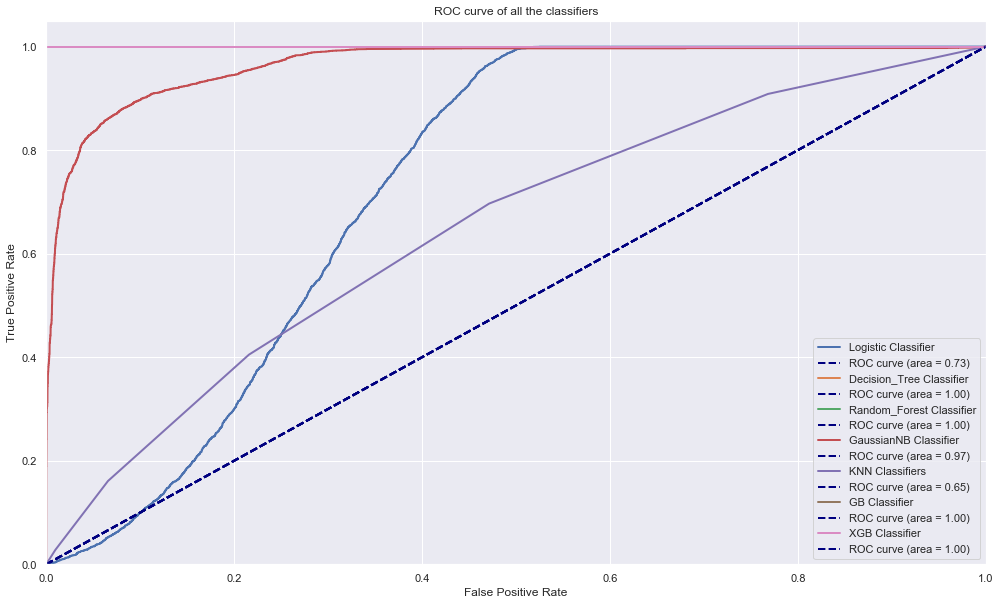

In [158]:
# All in one  Receiver Operating Characteristic (ROC) curve
plt.figure(figsize=(15,10))
for name, classifier in classifiers_dict.items():
    fit = classifier.fit(X_train, y_train)
    y_pred = classifier.predict_proba(X_val)[:,1]
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val,y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Roc curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val,y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    fpr = false_positive_rate
    tpr = true_positive_rate
 
    plt.plot(fpr, tpr,lw=2 ,label =name) #'ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve of all the classifiers')
    plt.grid(True)
    plt.legend(loc="lower right")
plt.show()



##### Observations: 
-  we are getting 100% accuracy for Decision tree, random forest, Gradient Boosting and XGB classifiers. So, we are okay with the model performance. 


###  Model Evaluation and Validation

Ad we can see we are getting 100% accuracy in the prediction, so i don't want to do the  parameter tunning process.

### For Sanity Check

### Decision Tree

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [160]:
clf =  DecisionTreeClassifier(random_state=212)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

confusion_matrix(y_test, y_pred)
#print(" roc:",roc,"\n","acc:",acc,"\n","prec:",prec,"\n","rec:",rec,"\n","f1:",f1)

array([[9181,    0],
       [   0, 4762]])

In [162]:
(y_test==1).sum()

4762

In [163]:
(y_test==0).sum()

9181

The results are look good to me.

## <a id='6'> 6. Feature Engineering</a> 

- There is a scope for feature engineering. Due to time constraint I have not explored that option here. 

## <a id='#7'>7. CONCLUSION </a> 

###### Based on above exploration, I have found out that:

#### BOGO OFFER: ###
- Overall, it looks like that, women across all the ages complete the BOGO offers if they receive them. 
- Similarly, for other-gender, with above 40 age they are most likely to complete the orders if they receive offers.
   Male and Female with increasing income are more likely to complete the received BOGO offers.

#### DISCOUNT OFFER: ###
- Overall, female customers are more likely to avail discount offers than male customers of all age and income    groups.

#### INFORMATIONAL OFFER: ####
- 80% of men with more than 90k income see the informational offers sent by Starbucks, not sure if they complete them.

Also, one can use Decision tree, Random Forest,  GradientBoosting Classifier or XGB  model(s) to see if a new customer will complete the offers or not.

## <a id='#7.1'> 7.1. SCOPE FOR FURTHER INVESTIGATION</a>

 - One can use unsupervised learning for this customer recommendation.
 -  Also, one can use funk svd method for this customer recommendation.